In [199]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [200]:
data = pd.read_csv('csv/midterms_csv/melb_data.csv')

In [201]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [202]:
#data preprocessing
# Fill numerical columns with median
numerical_cols = ['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
for col in numerical_cols:
    data.fillna({col: data[col].median()}, inplace=True)

In [203]:
# Drop rows with missing categorical data
data.dropna(subset=['Type', 'CouncilArea', 'Regionname'], inplace=True)

In [204]:
# Encoding Categorical Variables
label_cols = ['Type', 'Method', 'CouncilArea', 'Regionname']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

In [205]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,0,1480000.0,1,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,126.0,1970.0,31,-37.7996,144.9984,2,4019.0
1,Abbotsford,25 Bloomburg St,2,0,1035000.0,1,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
2,Abbotsford,5 Charles St,3,0,1465000.0,3,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0
3,Abbotsford,40 Federation La,3,0,850000.0,0,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,126.0,1970.0,31,-37.7969,144.9969,2,4019.0
4,Abbotsford,55a Park St,4,0,1600000.0,4,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0


In [206]:
features = ['Rooms', 'Distance','Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 
           'Type', 'Method', 'CouncilArea', 'Regionname']
target = 'Price'

In [207]:
X = data[features]
y = data[target]

In [208]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [209]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [211]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [212]:
y_pred = model.predict(X_test_scaled)

In [213]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 226580842913.53
R² Score: 0.4902


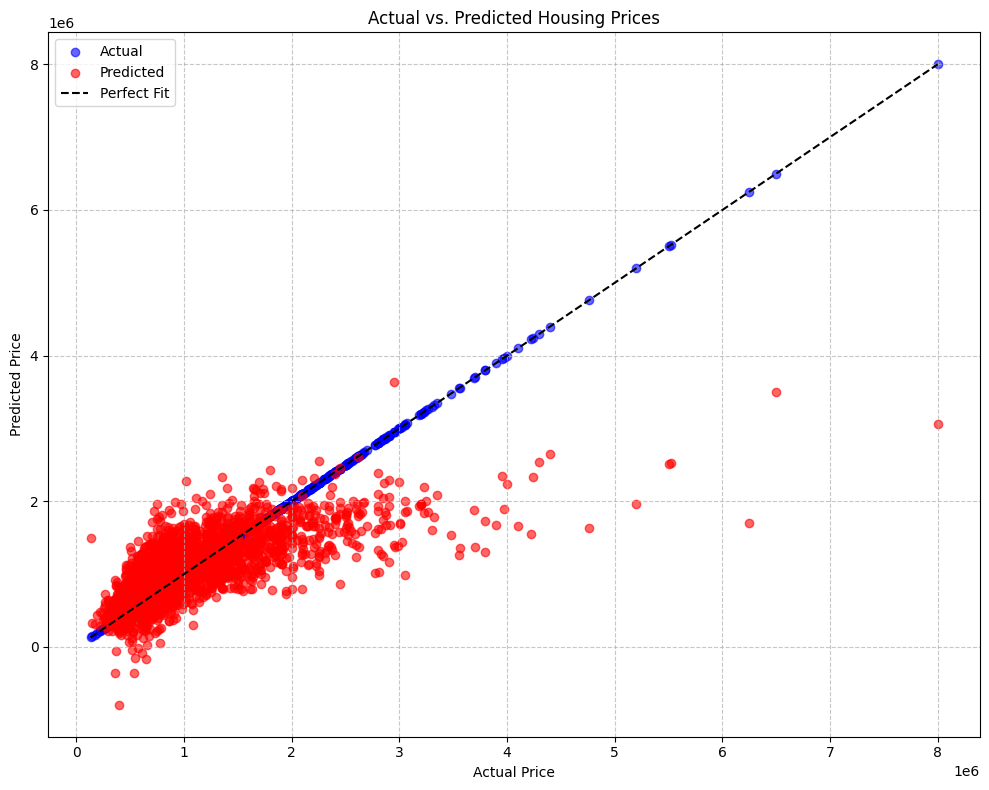

In [214]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Predicted') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Housing Prices")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [215]:
# clustering analysis
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

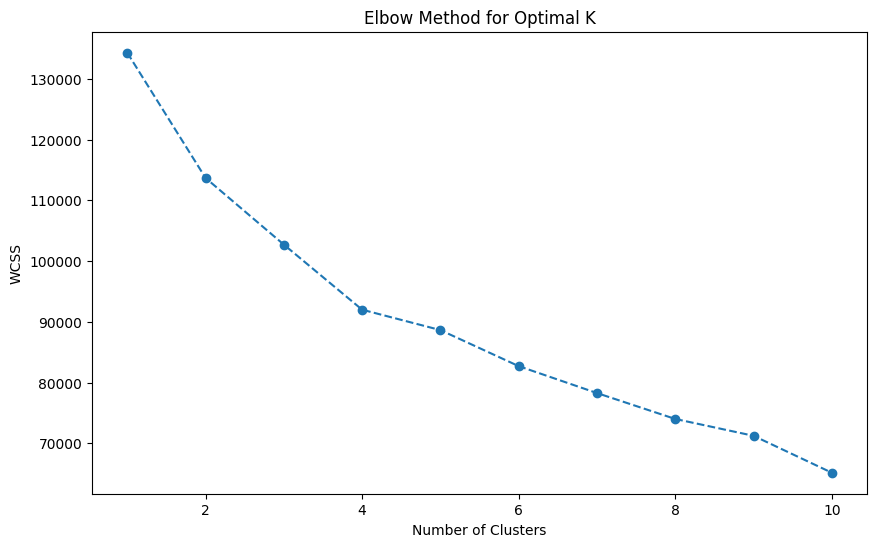

In [216]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [217]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [218]:
data['Cluster'] = clusters

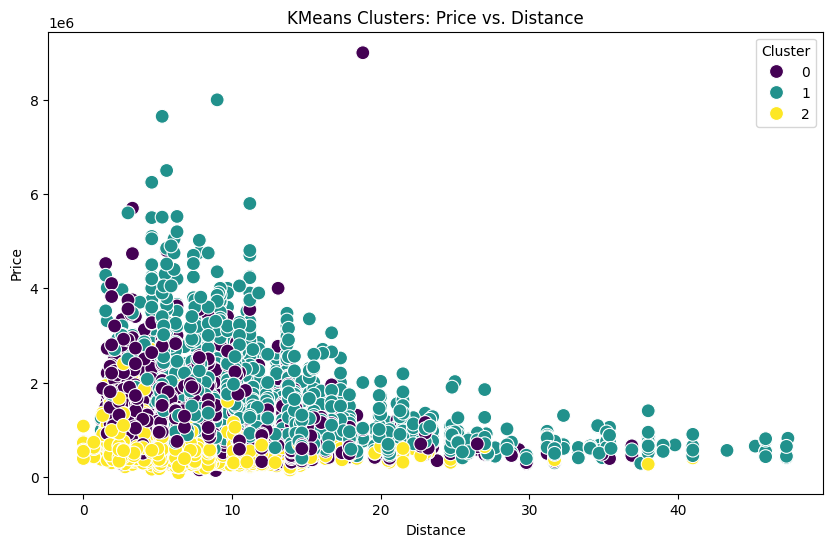

In [219]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', hue='Cluster', palette='viridis', data=data, s=100)
plt.title('KMeans Clusters: Price vs. Distance')
plt.show()